# Libs

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Data

In [31]:
df = pd.read_csv('./data/exchange_rate.csv', encoding='utf-8')
num_missing_values = df.isnull().sum()
print(f"👀 결측치 수\n {num_missing_values}개")
df.dropna(inplace=True)
print(f"✅ 결측치 삭제 확인 : {df.isnull().sum().sum()}개")
df


👀 결측치 수
 Time    4
rate    4
dtype: int64개
✅ 결측치 삭제 확인 : 0개


,Time,rate
0,1997/12/01,1163.8
1,1997/12/02,1174.4
2,1997/12/03,1240.6
3,1997/12/04,1249.5
4,1997/12/05,1156.1
...,...,...
6279,2023/01/06,1270.3
6280,2023/01/09,1267.2
6281,2023/01/10,1246.8
6282,2023/01/11,1240.8


# EDA

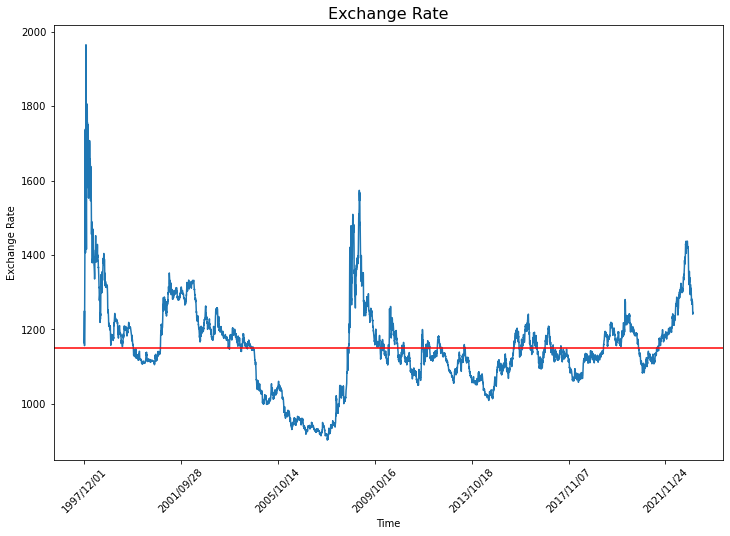

In [70]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Exchange Rate", fontsize=16)
ax.plot(df['Time'], df['rate'])
ax.axhline(mean_rate, color='red')
ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000, 6000])
ax.set_xlabel("Time")
ax.set_ylabel("Exchange Rate")
plt.xticks(rotation=45)
plt.show()

# After Scaling

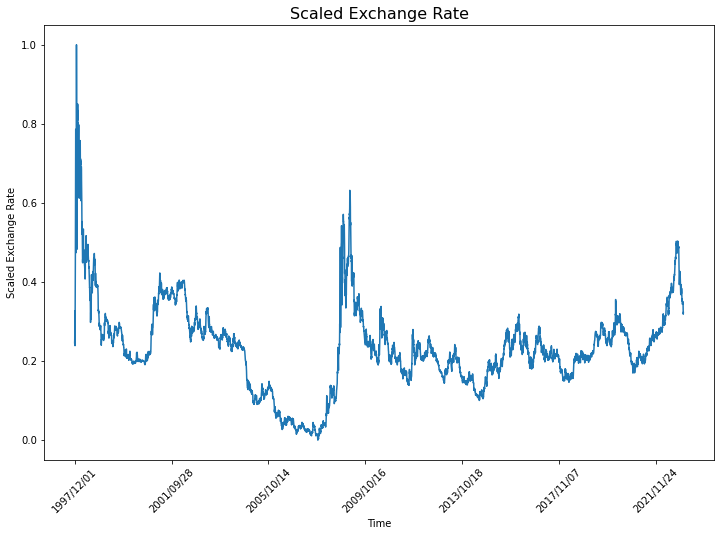

In [121]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
scaled = mm.fit_transform(df[['rate']])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Scaled Exchange Rate", fontsize=16)
ax.plot(df['Time'], scaled)
ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000, 6000])
ax.set_xlabel("Time")
ax.set_ylabel("Scaled Exchange Rate")
plt.xticks(rotation=45)
plt.show()

In [116]:
L = df.shape[0]

input_window = 14
output_window = 7
stride = 1

num_samples = ((L - input_window - output_window) // stride) + 1


Xs = np.zeros([input_window, num_samples])
Ys= np.zeros([output_window, num_samples])
print(Xs.shape, Ys.shape)

for i in range(num_samples): # Samples를 만듭니다.
    x_start = stride * i 
    x_end = x_start + input_window
    Xs[:, i] = df['rate'][x_start:x_end]

    y_start = stride * i + input_window 
    y_end = y_start + output_window
    Ys[:, i] = df['rate'][y_start:y_end]

Xs = Xs.reshape(Xs.shape[0], Xs.shape[1], 1).transpose((1,0,2))
Ys = Ys.reshape(Ys.shape[0], Ys.shape[1], 1).transpose((1,0,2))

print(Xs.shape, Ys.shape) 

print(Xs[-1])
print(Ys[-1])

(14, 6264) (7, 6264)
(6264, 14, 1) (6264, 7, 1)
[[1296. ]
 [1301. ]
 [1310.1]
 [1302. ]
 [1298. ]
 [1286.6]
 [1276.1]
 [1282.2]
 [1276.4]
 [1268.3]
 [1268.4]
 [1267.3]
 [1267.3]
 [1268.9]]
[[1272.1]
 [1274.7]
 [1270.3]
 [1267.2]
 [1246.8]
 [1240.8]
 [1245.3]]


In [117]:
df.iloc[-21:]

,Time,rate
6263,2022/12/15,1296.0
6264,2022/12/16,1301.0
6265,2022/12/19,1310.1
6266,2022/12/20,1302.0
6267,2022/12/21,1298.0
6268,2022/12/22,1286.6
6269,2022/12/23,1276.1
6270,2022/12/26,1282.2
6271,2022/12/27,1276.4
6272,2022/12/28,1268.3


In [118]:
arr = np.array([[1,2,3],
                [4,5,6],
                [7,8,9]])

arr[:,1]

array([2, 5, 8])

In [119]:
arr = [1,2,3,4,5,6,7,8,9,10]
samples = ((len(arr) - 3 - 1) // 1) + 1
print(samples)

7


6